<a href="https://colab.research.google.com/github/srithrishna/OS/blob/main/Data_Mining_Model_lab_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
cd/content/drive/My Drive/Dataset

/content/drive/My Drive/Dataset


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
dataset=pd.read_csv("amazon.csv")

In [9]:
dataset.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [10]:
dataset["Genre"]=dataset["Genre"].map({"Non Fiction": 1,"Fiction":0})

In [11]:
dataset.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,1
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,0
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,1
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,0
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,1


**Distance Based Method**

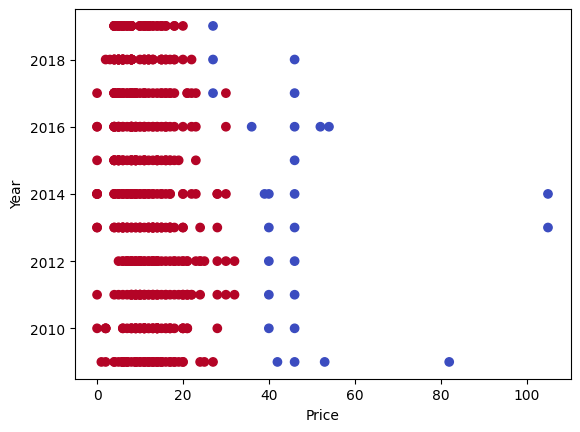

In [12]:
from sklearn.cluster import DBSCAN
x=dataset.loc[:,["Price","Year"]].values
dbscan=DBSCAN(eps=3,min_samples=9).fit(x)
labels=dbscan.labels_
plt.scatter(x[:,0],x[:,1],c=labels,cmap="coolwarm")
plt.xlabel("Price")
plt.ylabel("Year")
plt.show()

In [13]:
c=dataset.Price.value_counts().to_frame()
print(c)

     Price
8       52
6       38
9       38
5       36
11      35
4       32
14      30
13      29
10      28
12      27
7       23
15      21
16      20
17      19
20      17
18      14
0       12
46      10
21       9
22       6
28       6
24       5
23       5
2        5
40       5
30       5
19       4
27       4
32       2
25       2
105      2
52       1
54       1
3        1
39       1
53       1
1        1
36       1
82       1
42       1


In [14]:
c.shape

(40, 1)

**Hierarchical method**

In [15]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc

In [16]:
dataset=dataset.drop("Name",axis=1)
x=dataset.drop("Author",axis=1)

In [17]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_normalized=normalize(x_scaled)
x_normalized=pd.DataFrame(x_normalized)

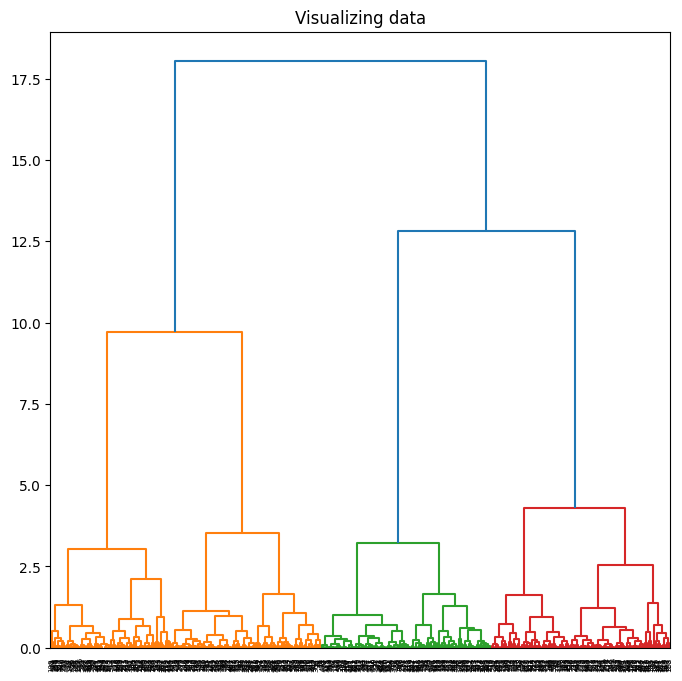

In [18]:
pca=PCA(n_components=2)
x_principle=pca.fit_transform(x_normalized)
x_principle=pd.DataFrame(x_principle)
x_principle.columns=['P1','P2']
plt.figure(figsize=(8,8))
plt.title("Visualizing data")
Dendrogram=shc.dendrogram((shc.linkage(x_principle,method='ward')))

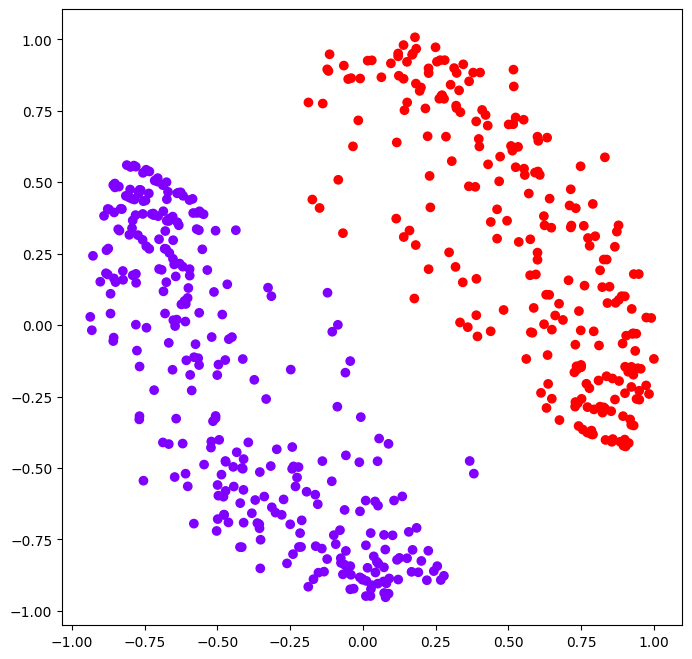

In [19]:
ac2=AgglomerativeClustering(n_clusters=2)
plt.figure(figsize=(8,8))
plt.scatter(x_principle['P1'],x_principle['P2'],c=ac2.fit_predict(x_principle),cmap="rainbow")
plt.show()

**Centroid**

In [20]:
x=dataset.loc[:,["Price","Year"]].values
import sklearn.cluster
kmeans=sklearn.cluster.KMeans(n_clusters=5,init="k-means++",random_state=0).fit(x)
print("\n\n kmeans Cluster centers")
print(kmeans.cluster_centers_)



 kmeans Cluster centers
[[   6.05726872 2015.07929515]
 [  44.57142857 2013.0952381 ]
 [  22.32911392 2013.12658228]
 [  12.9        2013.31363636]
 [  97.33333333 2012.        ]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [21]:
print("\n\n Kmeans Labels")
print(kmeans.labels_)



 Kmeans Labels
[0 2 3 0 3 3 2 3 0 0 0 0 2 0 3 0 0 0 0 3 3 3 3 0 3 0 0 3 0 3 2 2 3 3 3 3 3
 2 3 0 0 0 0 0 2 2 3 3 3 3 3 3 3 0 0 0 3 3 3 3 0 0 0 0 0 0 0 3 3 4 4 0 3 2
 0 3 3 0 0 3 3 0 0 0 0 0 0 0 2 0 3 0 3 3 3 0 2 3 3 0 0 0 3 0 0 3 3 3 2 0 0
 0 0 0 0 3 0 3 0 0 0 2 3 0 0 0 0 0 3 3 3 3 2 3 0 3 3 0 0 3 3 3 3 0 0 0 0 0
 3 3 0 1 3 2 3 2 2 2 0 1 0 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 2 3 2 3
 3 3 0 0 0 0 0 0 0 3 3 3 2 3 3 0 0 0 0 0 0 0 3 0 0 0 0 0 3 2 0 3 2 3 0 3 0
 3 0 0 3 2 3 2 0 0 0 0 3 3 3 0 0 0 3 3 3 0 3 2 0 0 0 0 0 0 0 0 0 3 3 3 0 3
 3 2 2 0 0 0 2 2 2 0 3 3 1 1 1 1 1 1 1 1 1 1 0 2 0 3 3 3 3 3 3 2 2 3 0 0 0
 3 3 0 2 3 2 2 0 3 3 3 3 3 3 3 3 3 2 3 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 3 2 2
 2 2 3 3 3 1 3 3 3 3 3 3 3 1 0 0 0 0 3 3 3 2 0 0 3 0 3 0 0 0 3 3 3 3 0 3 0
 0 0 0 0 3 0 0 0 0 0 0 0 2 0 3 3 3 3 0 0 0 0 2 2 0 0 0 3 3 0 3 3 0 0 0 0 3
 3 0 0 2 2 3 3 3 0 0 3 0 0 2 3 3 3 3 3 3 2 3 2 3 0 3 0 0 0 3 3 3 1 1 1 1 1
 1 3 3 3 2 2 3 0 0 2 2 2 3 3 3 0 0 0 3 3 3 3 3 0 0 3 0 3 0 4 3 0 0 0 0 0 0
 0 0 3 3

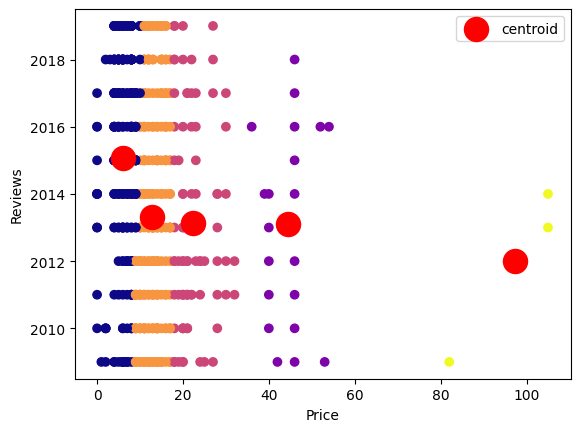

In [22]:
plt.scatter(x[:,0],x[:,1],c=kmeans.labels_,cmap="plasma")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c="red",label="centroid")
plt.legend()
plt.xlabel("Price")
plt.ylabel("Reviews")
plt.show()

**KNN**

In [23]:
dataset.shape

(550, 6)

In [24]:
dataset.columns

Index(['Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [25]:
x=dataset.loc[0:550,["User Rating","Reviews","Price","Year"]]
y=dataset.loc[0:550,["Genre"]]

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(knn.score(x_test,y_test)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

70.0
[[28 21]
 [12 49]]
              precision    recall  f1-score   support

           0       0.70      0.57      0.63        49
           1       0.70      0.80      0.75        61

    accuracy                           0.70       110
   macro avg       0.70      0.69      0.69       110
weighted avg       0.70      0.70      0.70       110



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


**Correlation**

<ipython-input-29-960c062099ea>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=dataset.corr(method="kendall")


Correlation between Price and Year [[ 1.         -0.15397858]
 [-0.15397858  1.        ]]


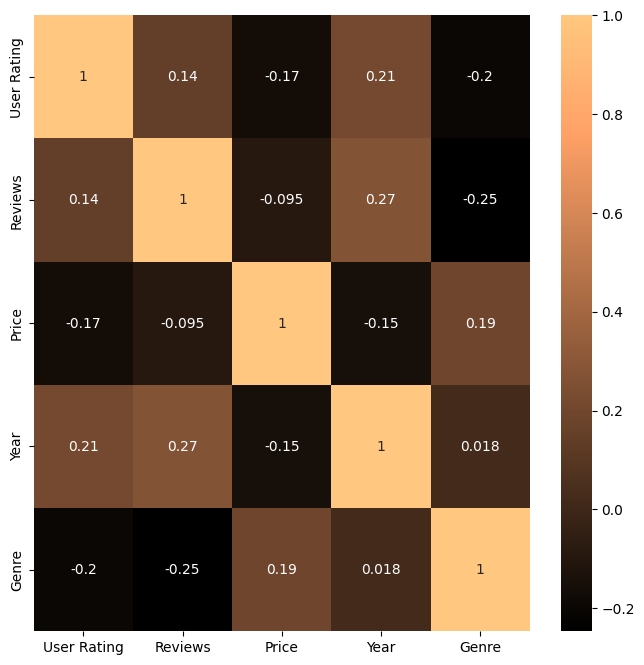

In [29]:
corr=dataset.corr(method="kendall")
corr
c=np.corrcoef(dataset["Price"],dataset["Year"])
print("Correlation between Price and Year",c)
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True,cmap="copper")
plt.show()


<ipython-input-30-76a6fbee8a89>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=dataset.corr(method="pearson")


Correlation between Price and Year [[ 1.         -0.15397858]
 [-0.15397858  1.        ]]


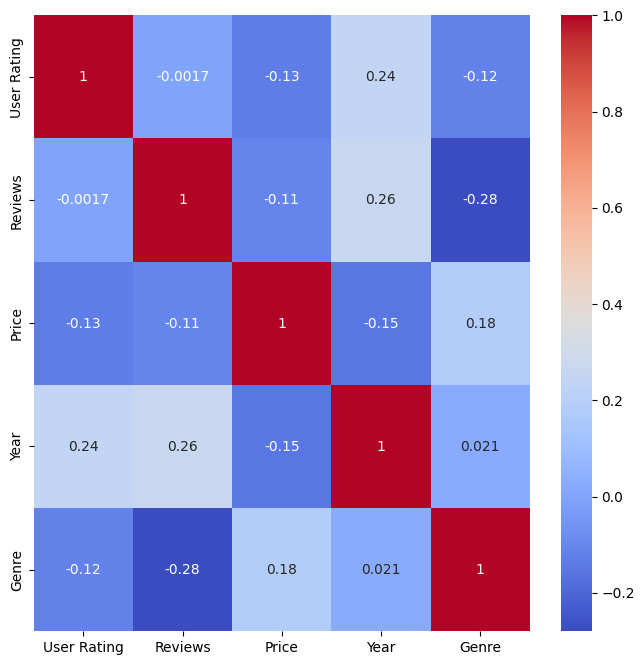

In [30]:
corr=dataset.corr(method="pearson")
corr
c=np.corrcoef(dataset["Price"],dataset["Year"])
print("Correlation between Price and Year",c)
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()

<ipython-input-31-6d7024273d4b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=dataset.corr(method="spearman")


Correlation between Price and Year [[ 1.         -0.15397858]
 [-0.15397858  1.        ]]


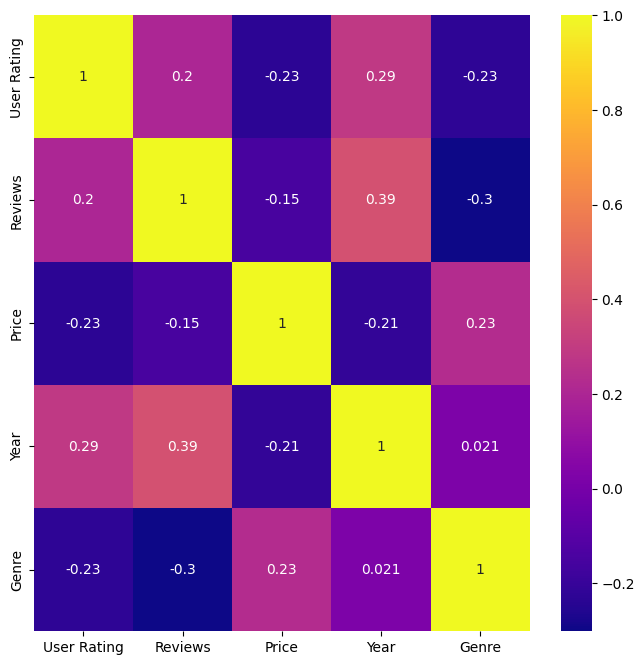

In [31]:
corr=dataset.corr(method="spearman")
corr
c=np.corrcoef(dataset["Price"],dataset["Year"])
print("Correlation between Price and Year",c)
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True,cmap="plasma")
plt.show()

**Linear Regression**

0.21871221542861247
0.11461431693335189


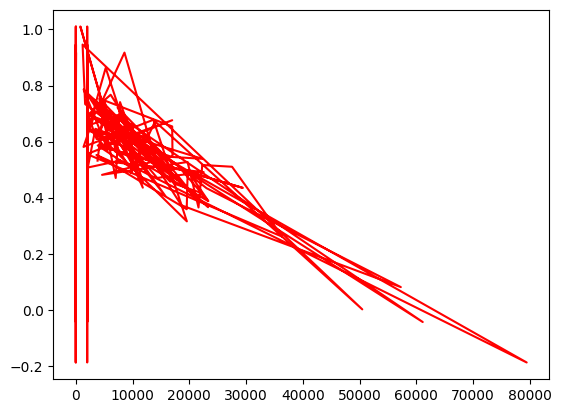

In [32]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
pred=regressor.predict(x_test)

from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,pred)
r2=r2_score(y_test,pred)
print(mse)
print(r2)
plt.plot(x_test,pred,color="Red")

**Logistic Regression**

In [33]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

59.09090909090909
              precision    recall  f1-score   support

           0       0.56      0.39      0.46        49
           1       0.61      0.75      0.67        61

    accuracy                           0.59       110
   macro avg       0.58      0.57      0.56       110
weighted avg       0.58      0.59      0.58       110

[[19 30]
 [15 46]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Axes: xlabel='Genre'>

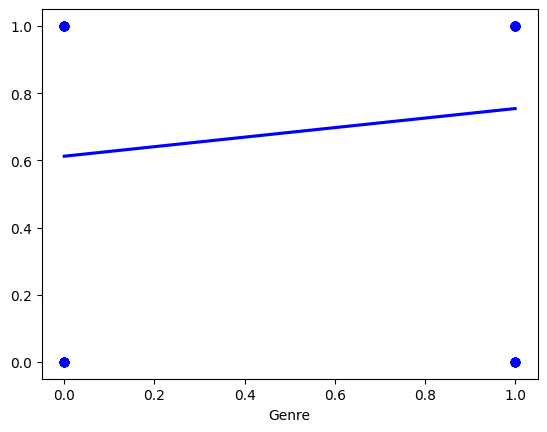

In [34]:
logreg.fit(x_train,y_train)
pred=logreg.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
sns.regplot(x=y_test,y=pred,ci=None,color="Blue")

**Naive Bayes**

In [35]:
from sklearn.naive_bayes import GaussianNB
gaus=GaussianNB()
gaus.fit(x_train,y_train)
pred=gaus.predict(x_test)
print(precision_score(y_test,pred)*100)
print(recall_score(y_test,pred)*100)
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))


60.71428571428571
83.60655737704919
              precision    recall  f1-score   support

           0       0.62      0.33      0.43        49
           1       0.61      0.84      0.70        61

    accuracy                           0.61       110
   macro avg       0.61      0.58      0.57       110
weighted avg       0.61      0.61      0.58       110

[[16 33]
 [10 51]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**DecisionTree**

[Text(0.6298532196969697, 0.9666666666666667, 'x[0] <= 4.75\ngini = 0.491\nsamples = 440\nvalue = [191, 249]'),
 Text(0.4049084595959596, 0.9, 'x[1] <= 18321.5\ngini = 0.441\nsamples = 299\nvalue = [98, 201]'),
 Text(0.21385732323232323, 0.8333333333333334, 'x[3] <= 2009.5\ngini = 0.363\nsamples = 239\nvalue = [57, 182]'),
 Text(0.04040404040404041, 0.7666666666666667, 'x[1] <= 5287.0\ngini = 0.496\nsamples = 35\nvalue = [16, 19]'),
 Text(0.020202020202020204, 0.7, 'x[1] <= 964.5\ngini = 0.413\nsamples = 24\nvalue = [7, 17]'),
 Text(0.010101010101010102, 0.6333333333333333, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.030303030303030304, 0.6333333333333333, 'x[1] <= 1541.5\ngini = 0.484\nsamples = 17\nvalue = [7, 10]'),
 Text(0.020202020202020204, 0.5666666666666667, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.04040404040404041, 0.5666666666666667, 'x[0] <= 4.25\ngini = 0.408\nsamples = 14\nvalue = [4, 10]'),
 Text(0.020202020202020204, 0.5, 'x[2] <= 14.5\ngini = 0.444\n

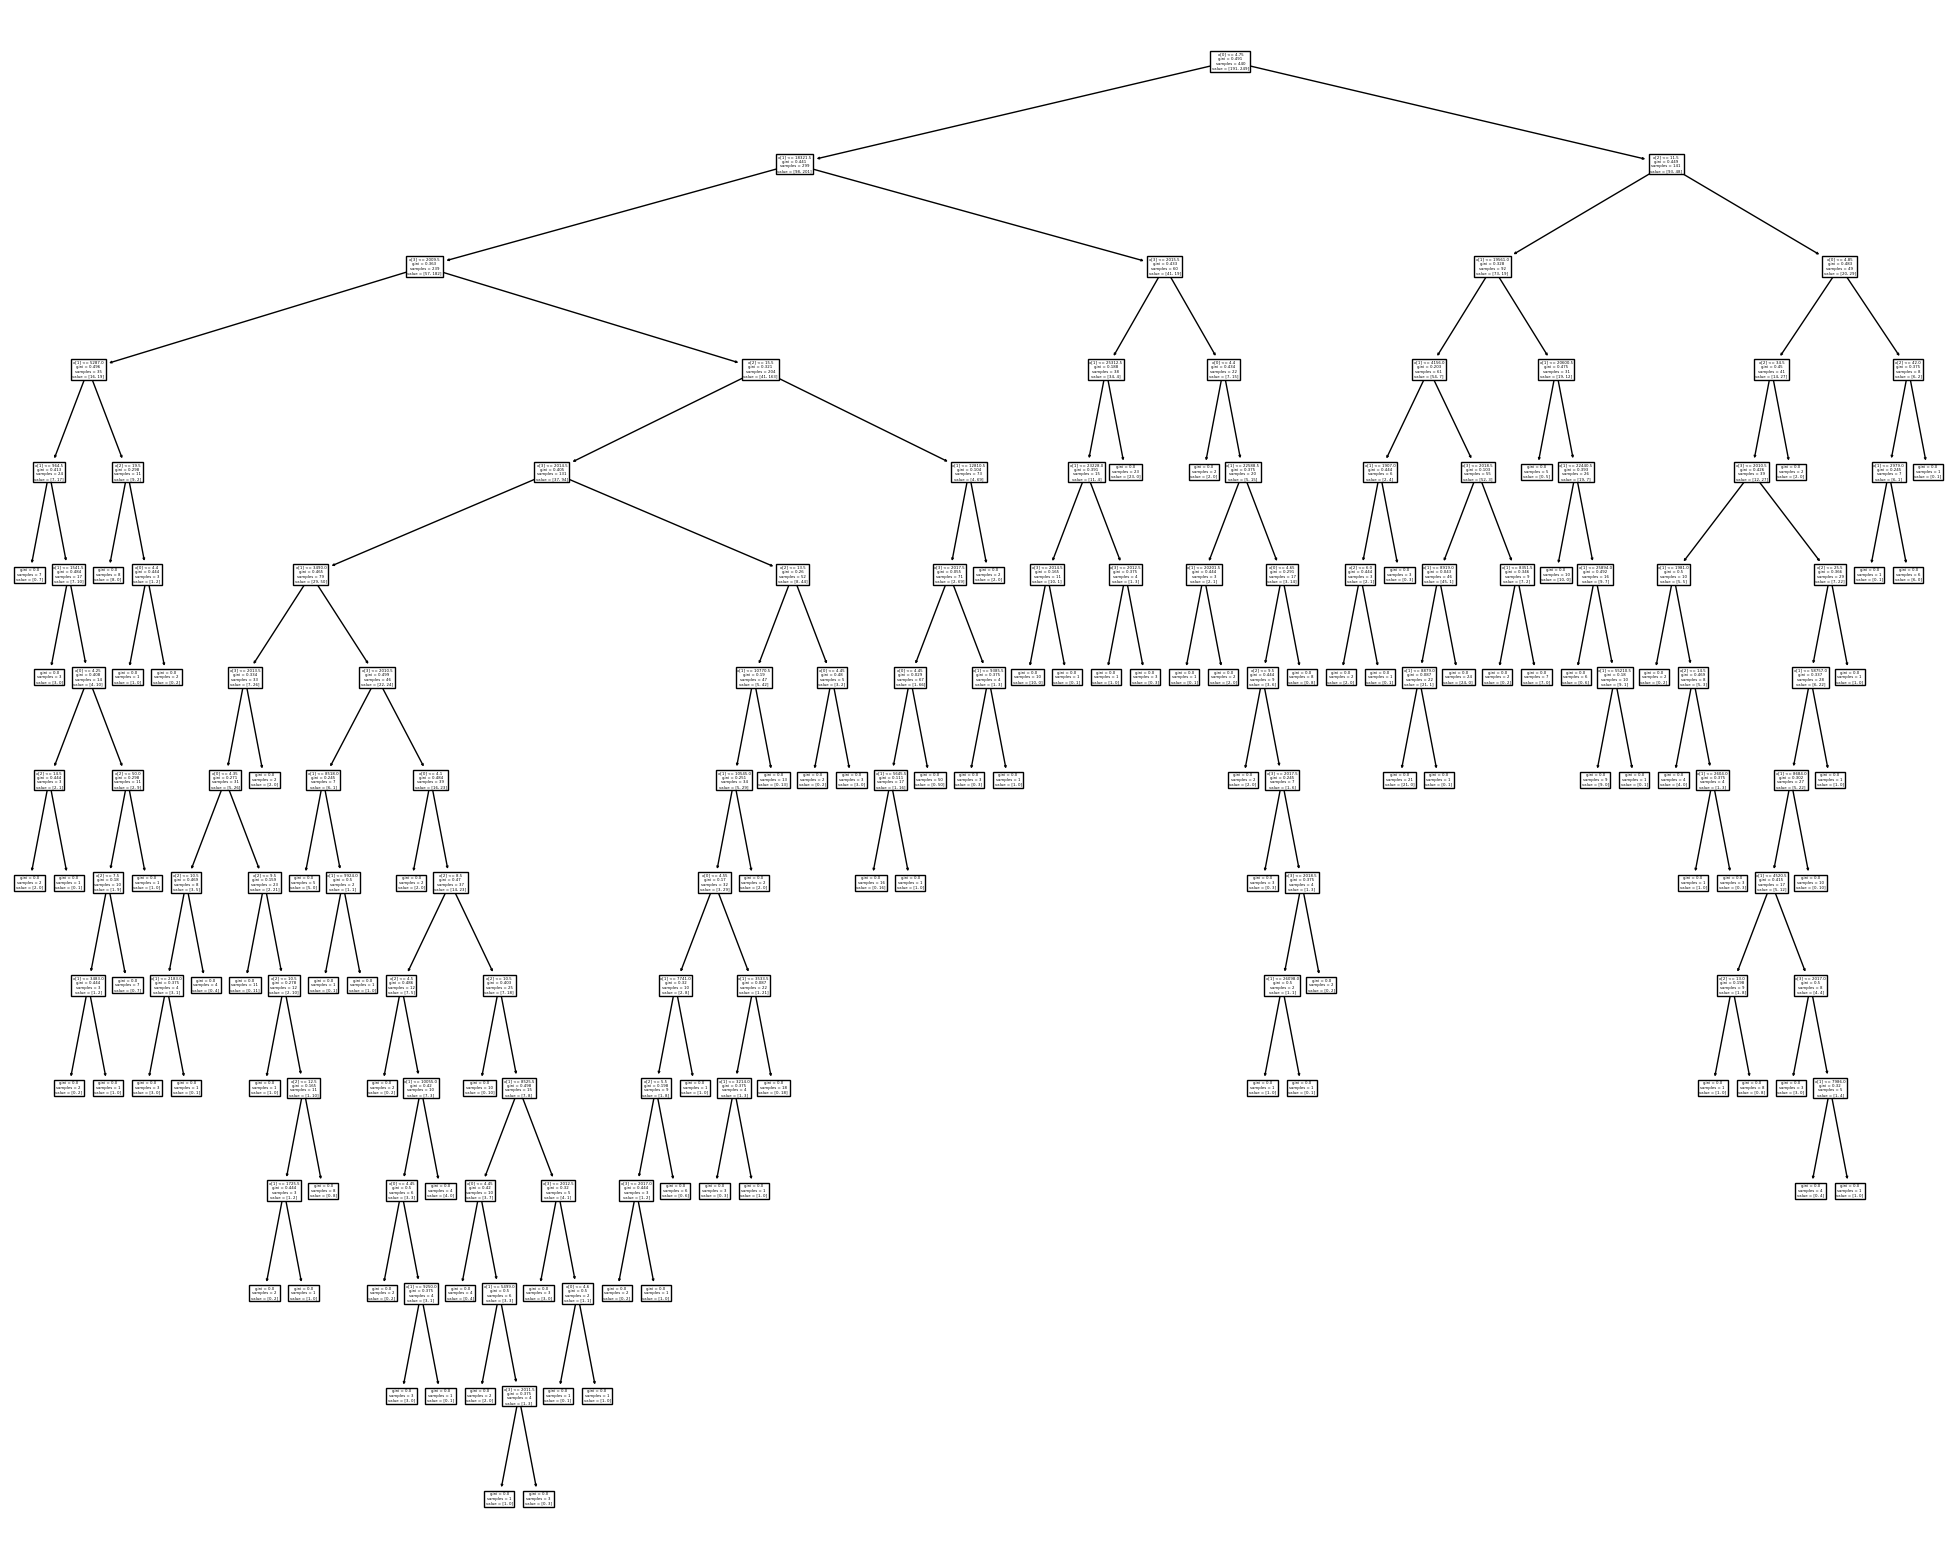

In [36]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
from sklearn import tree
fig=plt.figure(figsize=(25,20))
tree.plot_tree(dt.fit(x_train,y_train))

**Apriori**

In [37]:
!pip install apyori
from apyori import apriori


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
dataset2=pd.read_csv("bank.csv")
dataset2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Prediction
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [39]:
dataset2.shape

(4119, 21)

In [40]:
dataset2.drop(dataset2.index[50:4119],inplace=True)

In [41]:
dataset2.shape

(50, 21)

In [42]:
records=[]
for i in range(0,50):
    records.append([str(dataset2.values[i,j])for j in range(0,3)])
print(records)

ass=apriori(records,min_support=0.0090,min_confidence=0.70,min_lift=1.1,min_length=2)
f=list(ass)
print(len(f))

[['30', 'blue-collar', 'married'], ['39', 'services', 'single'], ['25', 'services', 'married'], ['38', 'services', 'married'], ['47', 'admin.', 'married'], ['32', 'services', 'single'], ['32', 'admin.', 'single'], ['41', 'entrepreneur', 'married'], ['31', 'services', 'divorced'], ['35', 'blue-collar', 'married'], ['25', 'services', 'single'], ['36', 'self-employed', 'single'], ['36', 'admin.', 'married'], ['47', 'blue-collar', 'married'], ['29', 'admin.', 'single'], ['27', 'services', 'single'], ['44', 'admin.', 'divorced'], ['46', 'admin.', 'divorced'], ['45', 'entrepreneur', 'married'], ['50', 'blue-collar', 'married'], ['55', 'services', 'married'], ['39', 'technician', 'divorced'], ['29', 'technician', 'single'], ['40', 'management', 'married'], ['44', 'technician', 'married'], ['38', 'technician', 'married'], ['36', 'technician', 'divorced'], ['28', 'blue-collar', 'married'], ['47', 'admin.', 'single'], ['34', 'admin.', 'married'], ['38', 'technician', 'married'], ['33', 'services

In [54]:
for i in f:
    print(i)
    print("-------")

RelationRecord(items=frozenset({'20', 'single'}), support=0.02, ordered_statistics=[OrderedStatistic(items_base=frozenset({'20'}), items_add=frozenset({'single'}), confidence=1.0, lift=3.125)])
-------
RelationRecord(items=frozenset({'20', 'student'}), support=0.02, ordered_statistics=[OrderedStatistic(items_base=frozenset({'20'}), items_add=frozenset({'student'}), confidence=1.0, lift=50.0), OrderedStatistic(items_base=frozenset({'student'}), items_add=frozenset({'20'}), confidence=1.0, lift=50.0)])
-------
RelationRecord(items=frozenset({'services', '25'}), support=0.04, ordered_statistics=[OrderedStatistic(items_base=frozenset({'25'}), items_add=frozenset({'services'}), confidence=1.0, lift=4.166666666666667)])
-------
RelationRecord(items=frozenset({'services', '27'}), support=0.02, ordered_statistics=[OrderedStatistic(items_base=frozenset({'27'}), items_add=frozenset({'services'}), confidence=1.0, lift=4.166666666666667)])
-------
RelationRecord(items=frozenset({'27', 'single'}), 

**Preprocessing**

In [57]:
dataset.head()

,Author,User Rating,Reviews,Price,Year,Genre
0,JJ Smith,4.7,17350,8,2016,1
1,Stephen King,4.6,2052,22,2011,0
2,Jordan B. Peterson,4.7,18979,15,2018,1
3,George Orwell,4.7,21424,6,2017,0
4,National Geographic Kids,4.8,7665,12,2019,1


In [67]:
dataset=dataset.drop("Author",axis=1)

In [70]:

dataset.head()

,Reviews,Price,Year,Genre
0,17350,8,2016,1
1,2052,22,2011,0
2,18979,15,2018,1
3,21424,6,2017,0
4,7665,12,2019,1


In [72]:
dataset["point_bin"]=pd.qcut(dataset["Reviews"],q=3)
dataset.head()

,Reviews,Price,Year,Genre,point_bin
0,17350,8,2016,1,"(11881.0, 87841.0]"
1,2052,22,2011,0,"(36.999, 5272.0]"
2,18979,15,2018,1,"(11881.0, 87841.0]"
3,21424,6,2017,0,"(11881.0, 87841.0]"
4,7665,12,2019,1,"(5272.0, 11881.0]"


In [73]:
dataset["point_bin"].value_counts()

(36.999, 5272.0]      184
(5272.0, 11881.0]     183
(11881.0, 87841.0]    183
Name: point_bin, dtype: int64

In [74]:
dataset["point_bin"]=pd.qcut(dataset["Reviews"],q=[0,.2,.4,.6,.8,1])
dataset.head()

,Reviews,Price,Year,Genre,point_bin
0,17350,8,2016,1,"(10082.4, 19637.4]"
1,2052,22,2011,0,"(36.999, 3477.0]"
2,18979,15,2018,1,"(10082.4, 19637.4]"
3,21424,6,2017,0,"(19637.4, 87841.0]"
4,7665,12,2019,1,"(6364.6, 10082.4]"


In [75]:
dataset["point_bin"]=pd.qcut(dataset["Reviews"],q=[0,.2,.4,.6,.8,1], labels=['A', 'B', 'C', 'D', 'E'])
dataset.head()

,Reviews,Price,Year,Genre,point_bin
0,17350,8,2016,1,D
1,2052,22,2011,0,A
2,18979,15,2018,1,D
3,21424,6,2017,0,E
4,7665,12,2019,1,C


In [76]:
data=dataset["Reviews"]

In [77]:
data =data[:30]

In [78]:
data=np.sort(data)
print(data)

[  460   491   798  1909  2052  2313  2426  2925  2951  4149  5013  5153
  5360  5983  6310  7665  9198  9374 12159 12643 15921 17350 18979 19699
 19735 21424 23848 23848 36348 36348]


In [79]:
b1=np.zeros((10,3)) 
b2=np.zeros((10,3)) 
b3=np.zeros((10,3))

In [80]:
for i in range (0,30,3): 
  k=int(i/3) 
  mean=(data[i] + data[i+1] + data[i+2] )/3
  for j in range(3): 
    b1[k,j]=mean 

print("-----------------Mean Bin:----------------- \n",b1)

-----------------Mean Bin:----------------- 
 [[  583.           583.           583.        ]
 [ 2091.33333333  2091.33333333  2091.33333333]
 [ 2767.33333333  2767.33333333  2767.33333333]
 [ 4771.66666667  4771.66666667  4771.66666667]
 [ 5884.33333333  5884.33333333  5884.33333333]
 [ 8745.66666667  8745.66666667  8745.66666667]
 [13574.33333333 13574.33333333 13574.33333333]
 [18676.         18676.         18676.        ]
 [21669.         21669.         21669.        ]
 [32181.33333333 32181.33333333 32181.33333333]]


In [81]:
for i in range (0,30,3): 
  k=int(i/3) 
  for j in range (3): 
    b2[k,j]=data[i+1] 
print("-----------------Median Bin :----------------- \n",b2)

-----------------Median Bin :----------------- 
 [[  491.   491.   491.]
 [ 2052.  2052.  2052.]
 [ 2925.  2925.  2925.]
 [ 5013.  5013.  5013.]
 [ 5983.  5983.  5983.]
 [ 9198.  9198.  9198.]
 [12643. 12643. 12643.]
 [18979. 18979. 18979.]
 [21424. 21424. 21424.]
 [36348. 36348. 36348.]]


In [82]:
for i in range (0,30,3): 
  k=int(i/3) 
  for j in range (3): 
    if (data[i+j]-data[i]) < (data[i+2]-data[i+j]): 
      b3[k,j]=data[i] 
    else: 
      b3[k,j]=data[i+2]   

print("-----------------Boundary Bin:----------------- \n",b3)

-----------------Boundary Bin:----------------- 
 [[  460.   460.   798.]
 [ 1909.  1909.  2313.]
 [ 2426.  2951.  2951.]
 [ 4149.  5153.  5153.]
 [ 5360.  6310.  6310.]
 [ 7665.  9374.  9374.]
 [12159. 12159. 15921.]
 [17350. 19699. 19699.]
 [19735. 19735. 23848.]
 [23848. 36348. 36348.]]


In [83]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [92]:
dataset=dataset.drop("point_bin",axis=1)
dataset.head()

,Reviews,Price,Year,Genre
0,17350,8,2016,1
1,2052,22,2011,0
2,18979,15,2018,1
3,21424,6,2017,0
4,7665,12,2019,1


In [93]:
scaler=StandardScaler()
print(scaler.fit(dataset))
print(scaler.mean_)
print(scaler.transform(dataset))

StandardScaler()
[1.19532818e+04 1.31000000e+01 2.01400000e+03 5.63636364e-01]
[[ 0.46045266 -0.47080975  0.63245553  0.87988269]
 [-0.84478593  0.82160918 -0.9486833  -1.13651514]
 [ 0.59944035  0.17539971  1.26491106  0.87988269]
 ...
 [ 0.20286897 -0.47080975  0.9486833   0.87988269]
 [ 0.20286897 -0.47080975  1.26491106  0.87988269]
 [ 0.20286897 -0.47080975  1.58113883  0.87988269]]


In [100]:
scaler=MinMaxScaler()
dataset=scaler.fit_transform(dataset)
dataset=pd.DataFrame(dataset)
dataset.head()

,0,1,2,3
0,0.197178,0.076190,0.7,1.0
1,0.022949,0.209524,0.2,0.0
2,0.215730,0.142857,0.9,1.0
3,0.243577,0.057143,0.8,0.0
4,0.086875,0.114286,1.0,1.0
